# Apprentissage automatique pour les débutants : une introduction aux réseaux de neurones
**Une explication simple de leur fonctionnement et comment en implémenter un à partir de zéro en Python.**


**1. Blocs de construction : Neurones**
- Premièrement, nous devons parler des neurones, l'unité de base d'un réseau de neurones. Un neurone prend des entrées, fait des calculs avec elles et produit une sortie .
- Voici à quoi ressemble un neurone à 2 entrées :



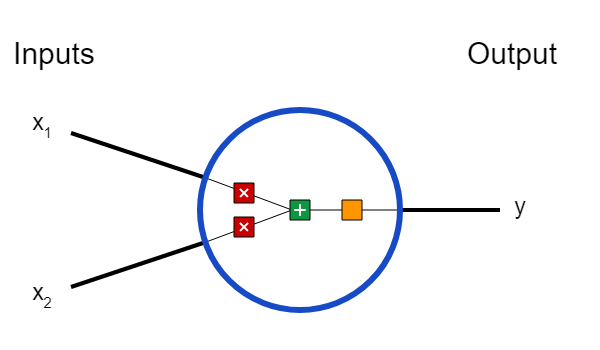


3 choses se passent ici. Tout d'abord, chaque entrée est multipliée par un poids :

**Fonction Sigmoide :**

- La fonction d'activation est utilisée pour transformer une entrée illimitée en une sortie qui a une forme agréable et prévisible.
- Une fonction d'activation couramment utilisée est la fonction sigmoïde :
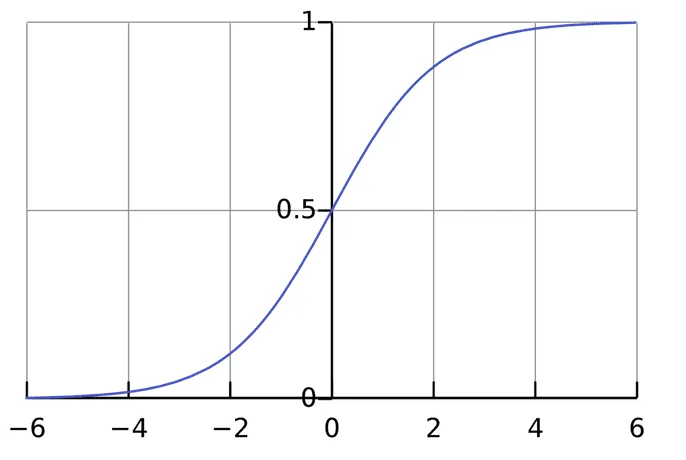


**Un exemple simple-**
- Si w 1​=0, w 2​=1, b=4 et Maintenant, donnons au neurone une entrée de x = [2, 3]

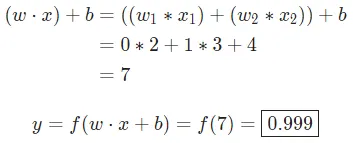


- Le neurone produit 0,999 étant donné les entrées x = [2, 3] x = [2,3].
- C'est le calcul exact qui se passe derrière pendant que nous codons un neurone en python et le processus de transmission des entrées vers l'avant pour obtenir une sortie est connu sous le nom de feedforward .


In [ ]:
import numpy as np

In [ ]:
def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return  1 / (1 + np.exp(-x))

In [ ]:
def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

**Perte**
- Avant de former notre réseau, nous avons d'abord besoin d'un moyen de quantifier à quel point il se comporte « bien » afin qu'il puisse essayer de faire « mieux ».

- Nous utiliserons la perte d'erreur quadratique moyenne (MSE) :

Décomposons cela :

- n est le nombre d'échantillons, qui est 4 (Alice, Bob, Charlie, Diana).

- y représente la variable prédite, qui est le sexe.

​
- y_vrai est la vraie valeur de la variable (la "bonne réponse").
​
- y_pred est la valeur prédite de la variable. C'est quelles que soient les sorties de notre réseau.

- (y_vrai-y_pred)^2 est connue sous le nom d' erreur quadratique . Notre fonction de perte prend simplement la moyenne de toutes les erreurs au carré (d'où le nom d' erreur au carré moyenne).
- Plus nos prédictions sont bonnes, plus nos pertes seront faibles !

**De meilleures prédictions = moins de perte.**

**Entraîner un réseau = essayer de minimiser sa perte.**


In [ ]:
def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

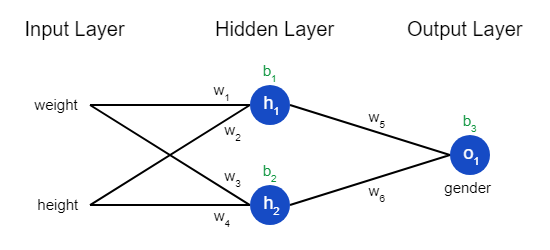


In [ ]:
class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))


In [ ]:
# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])


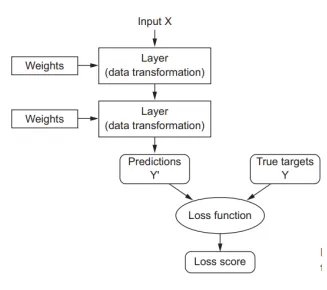


In [ ]:
# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

Epoch 0 loss: 0.255
Epoch 10 loss: 0.190
Epoch 20 loss: 0.157
Epoch 30 loss: 0.131
Epoch 40 loss: 0.109
Epoch 50 loss: 0.091
Epoch 60 loss: 0.076
Epoch 70 loss: 0.065
Epoch 80 loss: 0.055
Epoch 90 loss: 0.048
Epoch 100 loss: 0.041
Epoch 110 loss: 0.037
Epoch 120 loss: 0.033
Epoch 130 loss: 0.029
Epoch 140 loss: 0.026
Epoch 150 loss: 0.024
Epoch 160 loss: 0.022
Epoch 170 loss: 0.020
Epoch 180 loss: 0.019
Epoch 190 loss: 0.018
Epoch 200 loss: 0.016
Epoch 210 loss: 0.015
Epoch 220 loss: 0.014
Epoch 230 loss: 0.014
Epoch 240 loss: 0.013
Epoch 250 loss: 0.012
Epoch 260 loss: 0.012
Epoch 270 loss: 0.011
Epoch 280 loss: 0.011
Epoch 290 loss: 0.010
Epoch 300 loss: 0.010
Epoch 310 loss: 0.009
Epoch 320 loss: 0.009
Epoch 330 loss: 0.009
Epoch 340 loss: 0.008
Epoch 350 loss: 0.008
Epoch 360 loss: 0.008
Epoch 370 loss: 0.008
Epoch 380 loss: 0.007
Epoch 390 loss: 0.007
Epoch 400 loss: 0.007
Epoch 410 loss: 0.007
Epoch 420 loss: 0.006
Epoch 430 loss: 0.006
Epoch 440 loss: 0.006
Epoch 450 loss: 0.006

In [ ]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Emily: 0.968
Frank: 0.056
